In [47]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [5]:
# open zipped data files
df_gross = pd.read_csv("df_gross.zip")
df_rating = pd.read_csv("df_rating.zip")

In [7]:
# check df files
df_rating.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id.1,averagerating,numvotes,title,studio,domestic_gross,year
0,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",tt1375666,8.8,1841066,Inception,WB,292600000.0,2010
1,tt1345836,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller",tt1345836,8.4,1387769,The Dark Knight Rises,WB,448100000.0,2012
2,tt0816692,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",tt0816692,8.6,1299334,Interstellar,Par.,188000000.0,2014
3,tt1853728,Django Unchained,Django Unchained,2012,165.0,"Drama,Western",tt1853728,8.4,1211405,Django Unchained,Wein.,162800000.0,2012
4,tt0993846,The Wolf of Wall Street,The Wolf of Wall Street,2013,180.0,"Biography,Crime,Drama",tt0993846,8.2,1035358,The Wolf of Wall Street,Par.,116900000.0,2013


In [6]:
df_gross.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id.1,averagerating,numvotes,title,studio,domestic_gross_x,year,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross
0,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",tt1375666,8.8,1841066,Inception,WB,292600000.0,2010,38,"Jul 16, 2010",Inception,160000000,292576195,835524642
1,tt1345836,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller",tt1345836,8.4,1387769,The Dark Knight Rises,WB,448100000.0,2012,11,"Jul 20, 2012",The Dark Knight Rises,275000000,448139099,1084439099
2,tt0816692,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",tt0816692,8.6,1299334,Interstellar,Par.,188000000.0,2014,32,"Nov 5, 2014",Interstellar,165000000,188017894,666379375
3,tt1853728,Django Unchained,Django Unchained,2012,165.0,"Drama,Western",tt1853728,8.4,1211405,Django Unchained,Wein.,162800000.0,2012,69,"Dec 25, 2012",Django Unchained,100000000,162805434,449948323
4,tt0993846,The Wolf of Wall Street,The Wolf of Wall Street,2013,180.0,"Biography,Crime,Drama",tt0993846,8.2,1035358,The Wolf of Wall Street,Par.,116900000.0,2013,76,"Dec 25, 2013",The Wolf of Wall Street,100000000,116900694,389870414


In [18]:
df_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1378 entries, 0 to 1377
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           1378 non-null   object 
 1   primary_title      1378 non-null   object 
 2   original_title     1378 non-null   object 
 3   start_year         1378 non-null   int64  
 4   runtime_minutes    1378 non-null   float64
 5   genres             1378 non-null   object 
 6   movie_id.1         1378 non-null   object 
 7   averagerating      1378 non-null   float64
 8   numvotes           1378 non-null   int64  
 9   title              1378 non-null   object 
 10  studio             1378 non-null   object 
 11  domestic_gross_x   1378 non-null   float64
 12  year               1378 non-null   int64  
 13  id                 1378 non-null   int64  
 14  release_date       1378 non-null   object 
 15  movie              1378 non-null   object 
 16  production_budget  1378 

In [37]:
df_gross.describe()

,start_year,runtime_minutes,averagerating,numvotes,domestic_gross_x,year,id,production_budget,domestic_gross_y,worldwide_gross
count,1378.000000,1378.000000,1378.000000,1.378000e+03,1.378000e+03,1378.000000,1378.000000,1.378000e+03,1.378000e+03,1.378000e+03
mean,2013.653120,107.301887,6.439478,1.162326e+05,6.067686e+07,2013.723512,51.831640,4.640999e+07,6.055063e+07,1.513981e+08
std,2.521108,19.720679,1.014403,1.651563e+05,8.515963e+07,2.526786,28.560692,5.543063e+07,8.518984e+07,2.350158e+08
min,2010.000000,3.000000,1.600000,5.000000e+00,8.000000e+02,2010.000000,1.000000,5.000000e+04,0.000000e+00,0.000000e+00
25%,2011.000000,95.000000,5.900000,1.517450e+04,7.250000e+06,2011.000000,27.000000,1.000000e+07,7.195253e+06,1.753941e+07
50%,2014.000000,105.000000,6.500000,6.033650e+04,3.370000e+07,2014.000000,52.000000,2.500000e+07,3.333898e+07,6.531321e+07
75%,2016.000000,118.000000,7.100000,1.397005e+05,7.390000e+07,2016.000000,76.000000,5.800000e+07,7.409887e+07,1.707416e+08
max,2019.000000,192.000000,9.200000,1.841066e+06,7.001000e+08,2018.000000,100.000000,4.106000e+08,7.000596e+08,2.048134e+09


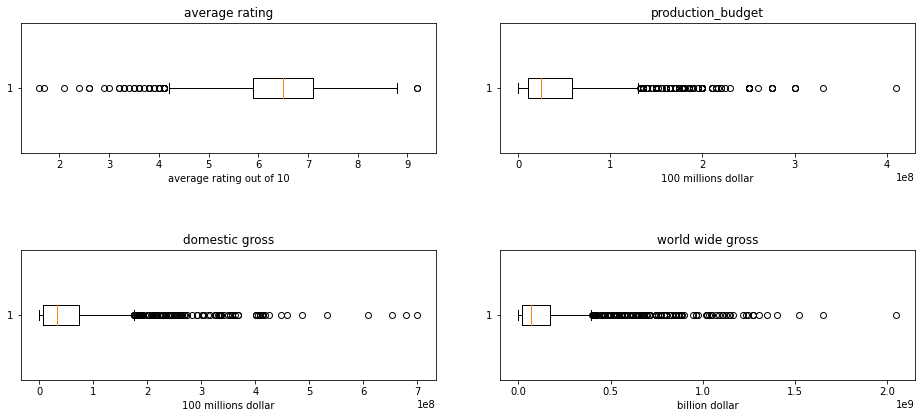

In [38]:
# for visual reference, boxplot

fig, axs = plt.subplots(2,2, figsize = (14,7))

axs[0,0].boxplot(df_gross.averagerating, vert=False)
axs[0,0].set_title('average rating')
axs[0,0].set(xlabel = 'average rating out of 10')

axs[0,1].boxplot(df_gross.production_budget, vert=False)
axs[0,1].set_title('production budget')
axs[0,1].set(xlabel = '100 millions dollar')

axs[1,0].boxplot(df_gross.domestic_gross_y, vert=False)
axs[1,0].set_title('domestic gross')
axs[1,0].set(xlabel = '100 millions dollar')

axs[1,1].boxplot(df_gross.worldwide_gross, vert=False)
axs[1,1].set_title('world wide gross')
axs[1,1].set(xlabel = 'billion dollar')
fig.tight_layout(pad=5.0)
plt.show()

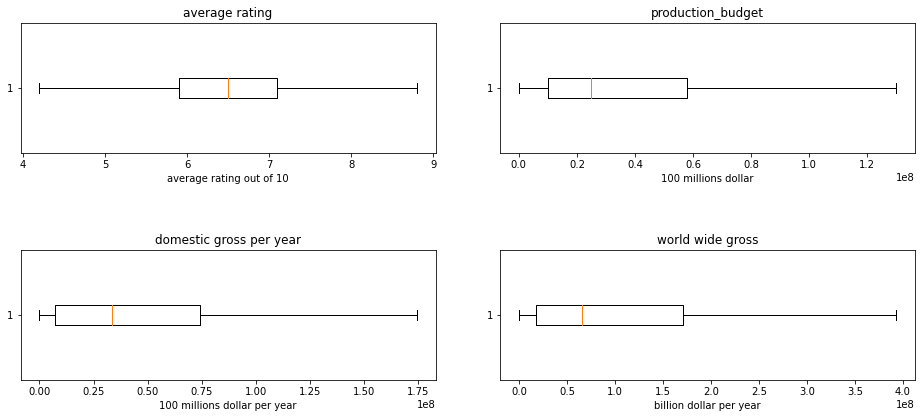

In [36]:
# visual without outliers

fig, axs = plt.subplots(2,2, figsize = (14,7))

axs[0,0].boxplot(df_gross.averagerating, vert=False, showfliers=False)
axs[0,0].set_title('average rating')
axs[0,0].set(xlabel = 'average rating out of 10')

axs[0,1].boxplot(df_gross.production_budget, vert=False, showfliers=False)
axs[0,1].set_title('production budget')
axs[0,1].set(xlabel = '100 millions dollar')

axs[1,0].boxplot(df_gross.domestic_gross_y, vert=False, showfliers=False)
axs[1,0].set_title('domestic gross per year')
axs[1,0].set(xlabel = '100 millions dollar per year')

axs[1,1].boxplot(df_gross.worldwide_gross, vert=False, showfliers=False)
axs[1,1].set_title('world wide gross')
axs[1,1].set(xlabel = 'billion dollar per year')
fig.tight_layout(pad=5.0)
plt.show()



In [ ]:
# bar chart 

fig, axs = plt.subplots(2,2, figsize = (14,7))

axs[0,0].bar(x = df_gross['genres'], height = df_gross['production_budget'])
axs[0,0].set_title('average rating')
axs[0,0].set(xlabel = 'average rating out of 10')

axs[0,1].bar(x = df_gross['production_budget'], height = df_gross['production_budget'])
axs[0,1].set_title('production budget')
axs[0,1].set(xlabel = '100 millions dollar')

axs[1,0].bar(x = df_gross['domestic_gross_y'], height = df_gross['production_budget'])
axs[1,0].set_title('domestic gross per year')
axs[1,0].set(xlabel = '100 millions dollar per year')

axs[1,1].bar(x = df_gross['worldwide_gross'], height = df_gross['production_budget'])
axs[1,1].set_title('world wide gross')
axs[1,1].set(xlabel = 'billion dollar per year')
fig.tight_layout(pad=5.0)
plt.show()



In [42]:
corr = df_gross['production_budget'].corr(df_gross['domestic_gross_y'])
print(corr)

0.7007716362149712


In [45]:
corr = df_gross['numvotes'].corr(df_gross['domestic_gross_y'])
print(corr)

0.5988645100607034


In [54]:
budgets = pd.read_csv("zippedData/tn.movie_budgets.csv.gz")
budgets.describe()

,id
count,5782.000000
mean,50.372363
std,28.821076
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


In [81]:
# t test

# production budget

t_stat, p_val = stats.ttest_ind(df_gross['domestic_gross_y'], df_gross['production_budget'], equal_var = False)
print(t_stat, p_val)


t_critic = stats.t.ppf(1-.01/2, len(df_gross['production_budget'])-1)
print(t_critic)

# t = (df_gross['production_budget'].mean() - budgets.mean() )/(df_gross['production_budget'].std()/np.sqrt(len(df_gross['production_budget'])))
# print(t)

5.164715618773915 2.609009037760468e-07
2.5794044451300455


In [82]:
# p value is smaller than alpha, reject null hypothesis
# null hypothesis: there is no relationship between budget and domestic gross
# alpha = 0.05
# there is significance between budgets and domestic gross

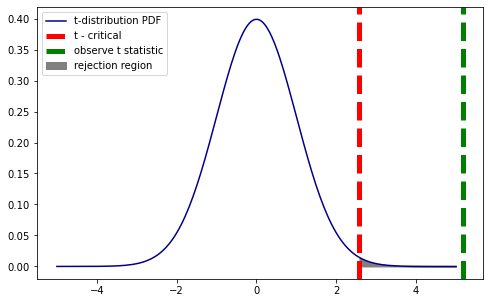

In [83]:
# Set up figure and axes
fig, ax = plt.subplots(figsize=(8,5))

# x = df_gross['domestic_gross_y']
# y = df_gross['production_budget']

# Generate data for plotting the PDF
# (1) generate points on the x axis between -5 and 5:
x = np.linspace(-5, 5, 200)
# (2) use stats.t.pdf to get values on the probability density
# function for the t-distribution
n = len(df_gross['production_budget'])
y = stats.t.pdf(x, n-1 , 0, 1)

# Plot the PDF as a line graph
ax.plot(x, y, color='darkblue', label="t-distribution PDF")

# Plot a vertical line for our measured difference in sales t-statistic
ax.axvline(t_critic, color='red', linestyle='--', lw=5,label='t - critical')
ax.axvline(t_stat, color='green', linestyle='--', lw=5,label='observe t statistic')

# Fill area under line graph where x value is creater than critical t
ax.fill_betweenx(y,x,t_critic,where=x > t_critic,color="gray",label="rejection region")


ax.legend()
plt.show()


Based on the line of best fit, our slop is 1.0769970959505735, and our y-intercept is 10567206.85134866
using median production budgets, we project domestic gross revenue equal 28086497.756722942
our calculated correlation is 0.7007716362149713


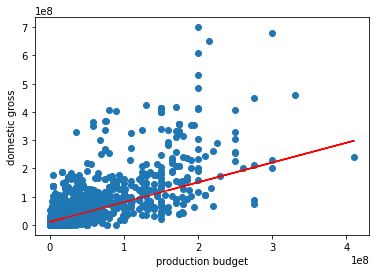

In [199]:
corr = df_gross['domestic_gross_y'].corr(df_gross['production_budget'])

plt.scatter(y = df_gross['domestic_gross_y'], x = df_gross['production_budget'])
plt.ylabel("domestic gross")
plt.xlabel("production budget")
a, b = np.polyfit( df_gross['production_budget'],df_gross['domestic_gross_y'], 1)
plt.plot(df_gross['production_budget'], corr*df_gross['production_budget']+b, c = 'red')
# plt.plot(df_gross['production_budget'], a*df_gross['production_budget']+b, c = 'orange')


print(f'Based on the line of best fit, our slop is {a}, and our y-intercept is {b}')

# plt.plot(df_gross['production_budget'], corr*df_gross['production_budget']+b, c = 'orange')

projection = corr*df_gross['production_budget'].median()+b

print(f'using median production budgets, we project domestic gross revenue equal {projection}')

print(f'our calculated correlation is {corr}')

plt.show()

budget has to be less than 35300000 to gain profit with 99 percent confidence level

In [ ]:
a > 0.7 *x + 10M
a - 10M = .7x
(a-10M) / .7 > x

In [91]:
# spend up to 33,338,979
df_gross['domestic_gross_y'].mean()

60550633.897677794

In [92]:
df_gross['domestic_gross_y'].median()

33338979.5

In [142]:
# anything more than this would return more money (domestic gross > budget)

corr * df_gross['domestic_gross_y'].median() + b

33930218.065301046

Based on the line of best fit, our slop is 3.2978020208792316, and our y-intercept is -1652843.917013149
using median production budgets, we project domestic gross revenue equal 17792580.209538776
our calculated correlation is 0.7778169650620771


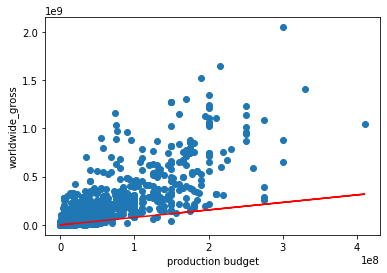

In [198]:
corr = df_gross['worldwide_gross'].corr(df_gross['production_budget'])

plt.scatter(y = df_gross['worldwide_gross'], x = df_gross['production_budget'])
plt.ylabel("worldwide_gross")
plt.xlabel("production budget")
a, b = np.polyfit( df_gross['production_budget'],df_gross['worldwide_gross'], 1)


plt.plot(df_gross['production_budget'], corr*df_gross['production_budget']+b, c = 'red')
# plt.plot(df_gross['production_budget'], a*df_gross['production_budget']+b, c = 'orange')


fit = np.polyfit(np.log(df_gross['production_budget']), df_gross['worldwide_gross'], 1)
#print(fit)


# plt.plot(df_gross['production_budget'], corr*df_gross['production_budget']+b, c = 'orange')

projection = corr*df_gross['production_budget'].median()+b



print(f'Based on the line of best fit, our slop is {a}, and our y-intercept is {b}')

print(f'using median production budgets, we project domestic gross revenue equal {projection}')

print(f'our calculated correlation is {corr}')



plt.show()